In [1]:
pip install httpx parsel textblob nltk pandas matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 75.6/75.6 kB 599.5 kB/s eta 0:00:00
     -------------------------------------- 626.3/626.3 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 77.9/77.9 kB 867.8 kB/s eta 0:00:00
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
     ---------------------------------------- 1.5/1.5 MB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import httpx # for http getting and sending requests
import Selector from parsel # for parsing html data using selectors

In [11]:
def scrape_reviews (url:str):
    def parse_data(response):
        selector = Selector(response.text)
        data=[]
        for review_box in selector.xpath("//div[@class='testimonial']"):
            data.append(review_box.xpath(".//p/text()").get())
        return data
    reviews=[]
    for page_number in range(1,7):
        response = httpx.get(url + f"?page={page_number}", headers={"referer": "https://web-scraping.dev/testimonials"})
        data=parse_data(response)
        reviews.extend(data)
    return reviews

In [12]:
reviews = scrape_reviews(
    url="https://web-scraping.dev/api/testimonials"
)
print(reviews)


["We've been using this utility for years - awesome service!", 'This Python app simplified my workflow significantly. Highly recommended.', 'Had a few issues at first, but their support team is top-notch!', 'A fantastic tool - it has everything you need and more.', 'The interface could be a little more user-friendly.', 'Been a fan of this app since day one. It just keeps getting better!', 'The recent updates really improved the overall experience.', "A decent web app. There's room for improvement though.", "The app is reliable and efficient. I can't imagine my day without it now.", 'Encountered some bugs. Hope they fix it soon.', "This web app is a game-changer! I've boosted my productivity.", 'The features are great but it took me a while to understand how to use them.', 'Love the simplicity and effectiveness of this app.', "It's an okay tool, but I've used better.", "Fantastic app! It's made my job so much easier.", "The learning curve is steep, but it's worth it.", 'Great concept bu

In [16]:
from textblob import TextBlob 
import nltk
import json

In [19]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

def sentiment_analysis(review_data):
    data=[]
    for review in review_data:
        blob = TextBlob(review)
        data.append({
            "text": review,
            "polarity_value": round(blob.polarity, 3),
            "polarity": "Positive" if blob.polarity >= 0.2 else ("Negative" if blob.polarity <= -0.2 else "Neutral"),
            "subjectivity_value": round(blob.subjectivity, 3),
            "subjectivity": "Opiniated" if blob.subjectivity >= 0.5 else "Factual"
        })
    return data

# scrape the review data
reviews = scrape_reviews(url="https://web-scraping.dev/api/testimonials")
# perform the sentiment analysis
sentiment_data = sentiment_analysis(reviews)
# save the results to a JSON file
with open("sentiment_data.json", "w", encoding="utf-8") as file:
    json.dump(sentiment_data, file, indent=2, ensure_ascii=False)
        

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [21]:
def create_insights(data):
    """create sentiment analysis insights"""
    # create a pandas dataframe
    df = pd.DataFrame(data)
    # set a visualization theme
    sns.set_theme(style="whitegrid")
    # set the figure layouts
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Sentiment Analysis Dashboard', fontsize=16)

    # 1. distribution of polarity values
    sns.histplot(df['polarity_value'], kde=True, ax=axes[0, 0], bins=20, color='blue')
    axes[0, 0].set_title('Distribution of Polarity Values')
    axes[0, 0].set_xlabel('Polarity Value')
    axes[0, 0].set_ylabel('Frequency')

    # 2. distribution of subjectivity values
    sns.histplot(df['subjectivity_value'], kde=True, ax=axes[0, 1], bins=20, color='green')
    axes[0, 1].set_title('Distribution of Subjectivity Values')
    axes[0, 1].set_xlabel('Subjectivity Value')
    axes[0, 1].set_ylabel('Frequency')

    # 3. counts of each polarity category
    sns.countplot(x='polarity', order=['Positive', 'Neutral', 'Negative'], data=df, ax=axes[1, 0], palette='viridis')
    axes[1, 0].set_title('Counts of Each Polarity Category')
    axes[1, 0].set_xlabel('Polarity')
    axes[1, 0].set_ylabel('Count')

    # 4. counts of each subjectivity category
    sns.countplot(x='subjectivity', data=df, ax=axes[1, 1], palette='magma')
    axes[1, 1].set_title('Counts of Each Subjectivity Category')
    axes[1, 1].set_xlabel('Subjectivity')
    axes[1, 1].set_ylabel('Count')

    # save the fig to a file
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig("./sentiment_analysis_insights.png")

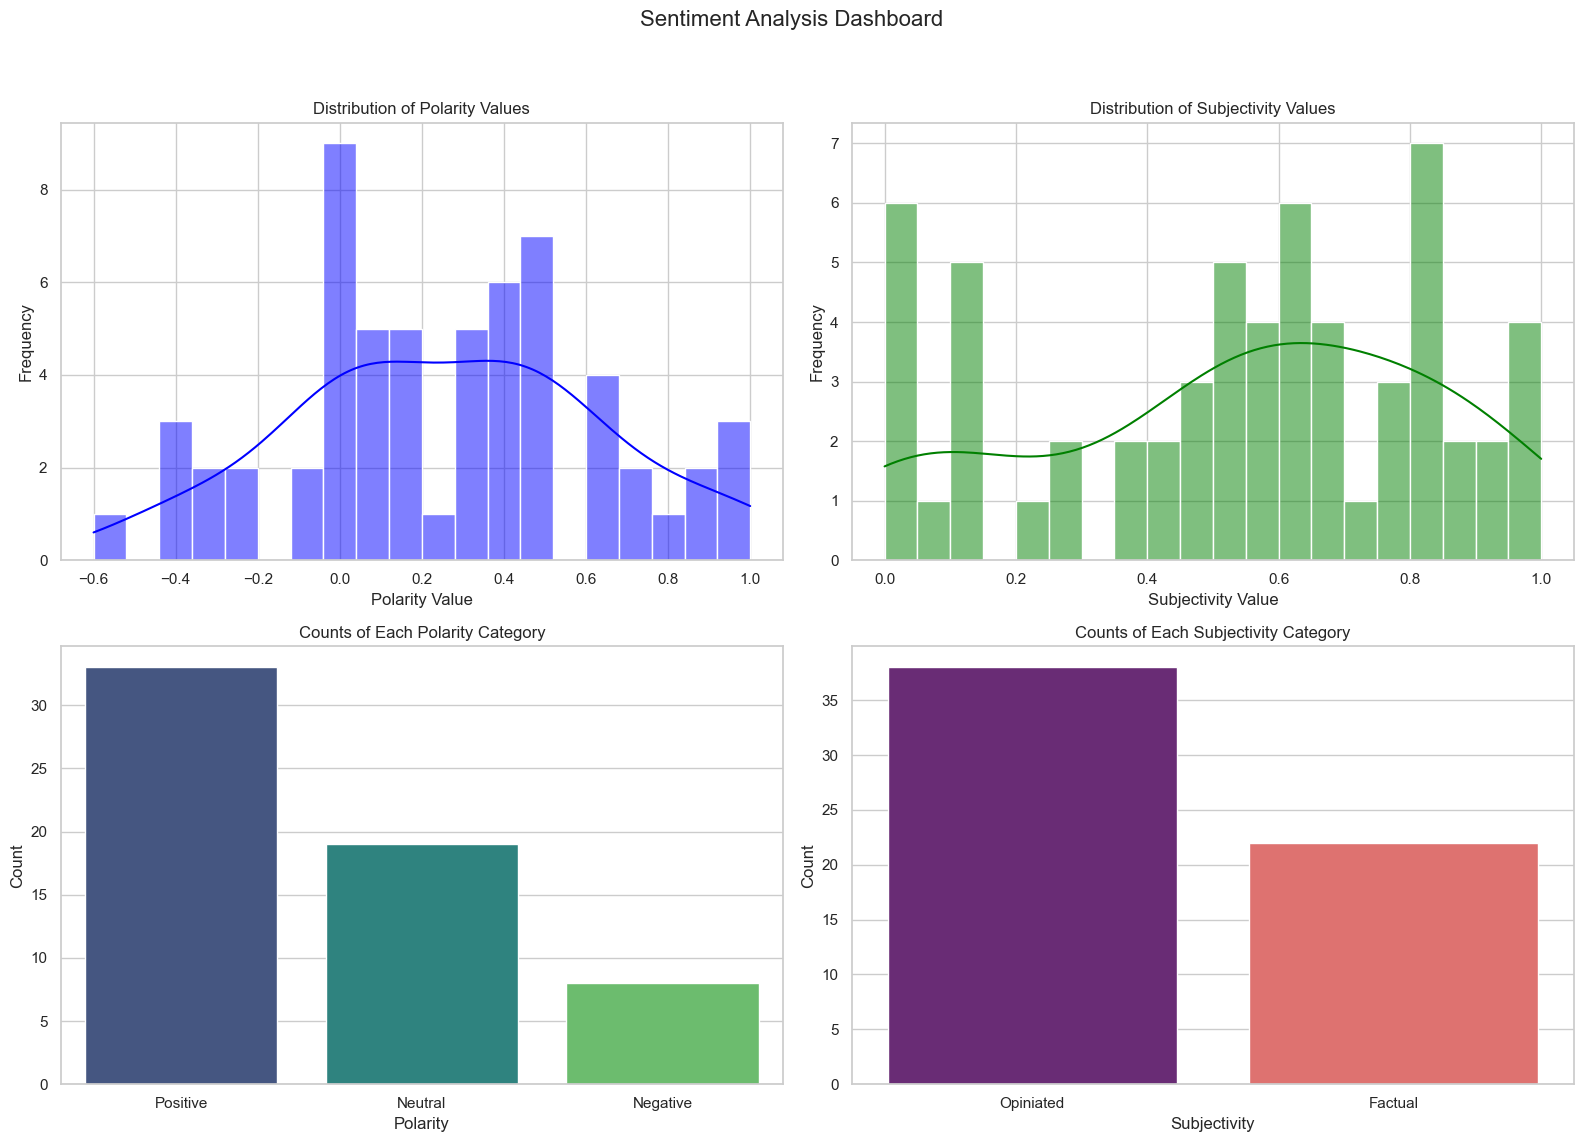

In [22]:
create_insights(sentiment_data)
